In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
# Load NYC Yellow Taxi Trip Dataset (Replace with actual file path)
file_path = "/content/yellow_tripdata_2020-01.parquet"

df_taxi = pd.read_parquet(file_path, engine="pyarrow")


In [4]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


In [5]:
df_taxi.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.405008e+06,6405008,6405008,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.339567e+06
mean,1.673002e+00,2020-01-17 03:05:16.413238,2020-01-17 03:21:13.417920,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.257319e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.299052e+00
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,2020-01-09 17:10:53,2020-01-09 17:27:34.750000,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,2020-01-16 23:16:29,2020-01-16 23:32:24,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2020-01-24 18:24:30,2020-01-24 18:39:51,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,5.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00
std,4.691265e-01,NaN,NaN,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.885669e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.017109e-01


In [6]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
print(df_taxi.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65441
trip_distance                  0
RatecodeID                 65441
store_and_fwd_flag         65441
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65441
airport_fee              6405008
dtype: int64


In [8]:
# Fill passenger_count with median (1.0 is typical for NYC taxis)
df_taxi['passenger_count'].fillna(1.0)

# Fill RatecodeID with mode (1.0 = standard rate)
df_taxi['RatecodeID'].fillna(1.0)

# Fill store_and_fwd_flag with 'N' (most common)
df_taxi['store_and_fwd_flag'].fillna('N')

# Fill congestion_surcharge with 0 (no surcharge if missing)
df_taxi['congestion_surcharge'].fillna(0.0)


,congestion_surcharge
0,2.5
1,2.5
2,2.5
3,0.0
4,0.0
...,...
6405003,0.0
6405004,0.0
6405005,0.0
6405006,0.0


In [9]:
columns_to_drop = [
    'VendorID',
    'store_and_fwd_flag',
    'airport_fee',
    'total_amount',           # Leaks fare info
    'fare_amount',            # Often duration-dependent
    'RatecodeID',             # If not one-hot encoded
    'PULocationID',           # If you've already encoded
    'DOLocationID',           # <- COMMA ADDED HERE
    'passenger_count',        # Now will be dropped
    'congestion_surcharge'    # Now will be dropped
]

df_taxi.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')



In [10]:
print("Missing values after cleaning:")
print(df_taxi.isnull().sum())


Missing values after cleaning:
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
payment_type             0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
dtype: int64


In [11]:
# Convert to datetime FIRST
df_taxi['tpep_pickup_datetime'] = pd.to_datetime(df_taxi['tpep_pickup_datetime'])
df_taxi['tpep_dropoff_datetime'] = pd.to_datetime(df_taxi['tpep_dropoff_datetime'])

# Calculate duration (must use BOTH datetimes)
df_taxi['trip_duration'] = (
    df_taxi['tpep_dropoff_datetime'] - df_taxi['tpep_pickup_datetime']
).dt.total_seconds() / 60  # minutes

# Extract day/hour features (before dropping!)
df_taxi['pickup_day'] = df_taxi['tpep_pickup_datetime'].dt.day
df_taxi['pickup_hour'] = df_taxi['tpep_pickup_datetime'].dt.hour

# NOW drop the raw timestamps (prevent leakage)
df_taxi.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)




In [12]:
# 3. Define robust outlier bounds (using IQR)
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.05)  # Using 5th/95th percentiles for robustness
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [13]:
# 4. Apply to all numeric columns
numeric_cols = ['trip_distance', 'trip_duration', 'extra',
               'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']

for col in numeric_cols:
    print(f"\nTreating outliers in {col}:")
    print(f"Original shape: {df_taxi.shape}")
    df_taxi = treat_outliers(df_taxi, col)
    print(f"New shape: {df_taxi.shape}")




Treating outliers in trip_distance:
Original shape: (6405008, 10)
New shape: (6396437, 10)

Treating outliers in trip_duration:
Original shape: (6396437, 10)
New shape: (6378533, 10)

Treating outliers in extra:
Original shape: (6378533, 10)
New shape: (6378520, 10)

Treating outliers in mta_tax:
Original shape: (6378520, 10)
New shape: (6301110, 10)

Treating outliers in tip_amount:
Original shape: (6301110, 10)
New shape: (6290713, 10)

Treating outliers in tolls_amount:
Original shape: (6290713, 10)
New shape: (5989689, 10)

Treating outliers in improvement_surcharge:
Original shape: (5989689, 10)
New shape: (5988553, 10)


In [14]:
# 5. Final sanity checks
print("\nFinal dataset shape:", df_taxi.shape)
print("\nOutlier-treated stats:")
print(df_taxi[numeric_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))





Final dataset shape: (5988553, 10)

Outlier-treated stats:
       trip_distance  trip_duration         extra    mta_tax    tip_amount  \
count   5.988553e+06   5.988553e+06  5.988553e+06  5988553.0  5.988553e+06   
mean    2.309453e+00   1.196386e+01  1.115462e+00        0.5  1.888256e+00   
std     2.571999e+00   8.198893e+00  1.232423e+00        0.0  1.795247e+00   
min    -1.494000e+01   0.000000e+00  0.000000e+00        0.5  0.000000e+00   
1%      1.200000e-01   1.383333e+00  0.000000e+00        0.5  0.000000e+00   
25%     9.300000e-01   6.216667e+00  0.000000e+00        0.5  0.000000e+00   
50%     1.520000e+00   1.001667e+01  5.000000e-01        0.5  1.860000e+00   
75%     2.600000e+00   1.553333e+01  2.500000e+00        0.5  2.750000e+00   
99%     1.480000e+01   4.073333e+01  3.500000e+00        0.5  8.360000e+00   
max     2.629000e+01   7.763333e+01  8.250000e+00        0.5  1.590000e+01   

       tolls_amount  improvement_surcharge  
count     5988553.0           5.9885

In [15]:
# 1. Remove physically impossible values
df_taxi = df_taxi[
    (df_taxi['trip_distance'] > 0.05) &     # Minimum 0.05 miles
    (df_taxi['trip_duration'] > 0.5) &      # Minimum 30 seconds
    (df_taxi['trip_duration'] < 180)        # Maximum 3 hours
]


In [16]:
# 2. Drop constant-value columns (no predictive power)
df_taxi.drop(['mta_tax', 'improvement_surcharge', 'tolls_amount'], axis=1, inplace=True)

# 3. Robust outlier capping (preserves more data than removal)
def cap_outliers(df, col):
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = np.where(df[col] < q1, q1, df[col])
    df[col] = np.where(df[col] > q99, q99, df[col])
    return df

for col in ['trip_distance', 'trip_duration', 'extra', 'tip_amount']:
    df_taxi = cap_outliers(df_taxi, col)


In [17]:
# 4. Final verification
print("\nFinal Statistics:")
print(df_taxi.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))
print("\nMissing Values Check:")
print(df_taxi.isnull().sum())



Final Statistics:
       trip_distance  payment_type         extra    tip_amount  trip_duration  \
count   5.932560e+06  5.932560e+06  5.932560e+06  5.932560e+06   5.932560e+06   
mean    2.300420e+00  1.257536e+00  1.117485e+00  1.871781e+00   1.190850e+01   
std     2.377303e+00  4.641199e-01  1.226671e+00  1.666120e+00   7.671933e+00   
min     3.000000e-01  0.000000e+00  0.000000e+00  0.000000e+00   1.816667e+00   
1%      3.000000e-01  1.000000e+00  0.000000e+00  0.000000e+00   1.816667e+00   
25%     9.500000e-01  1.000000e+00  0.000000e+00  0.000000e+00   6.283333e+00   
50%     1.540000e+00  1.000000e+00  5.000000e-01  1.860000e+00   1.005000e+01   
75%     2.610000e+00  2.000000e+00  2.500000e+00  2.750000e+00   1.555000e+01   
99%     1.486000e+01  2.000000e+00  3.500000e+00  8.200000e+00   4.031667e+01   
max     1.486000e+01  4.000000e+00  3.500000e+00  8.200000e+00   4.031667e+01   

         pickup_day   pickup_hour  
count  5.932560e+06  5.932560e+06  
mean   1.658305e+

In [18]:
print(df_taxi.dtypes)
print(df_taxi.isnull().sum())
print(df_taxi.describe())

trip_distance    float64
payment_type       int64
extra            float64
tip_amount       float64
trip_duration    float64
pickup_day         int32
pickup_hour        int32
dtype: object
trip_distance    0
payment_type     0
extra            0
tip_amount       0
trip_duration    0
pickup_day       0
pickup_hour      0
dtype: int64
       trip_distance  payment_type         extra    tip_amount  trip_duration  \
count   5.932560e+06  5.932560e+06  5.932560e+06  5.932560e+06   5.932560e+06   
mean    2.300420e+00  1.257536e+00  1.117485e+00  1.871781e+00   1.190850e+01   
std     2.377303e+00  4.641199e-01  1.226671e+00  1.666120e+00   7.671933e+00   
min     3.000000e-01  0.000000e+00  0.000000e+00  0.000000e+00   1.816667e+00   
25%     9.500000e-01  1.000000e+00  0.000000e+00  0.000000e+00   6.283333e+00   
50%     1.540000e+00  1.000000e+00  5.000000e-01  1.860000e+00   1.005000e+01   
75%     2.610000e+00  2.000000e+00  2.500000e+00  2.750000e+00   1.555000e+01   
max     1.486000e

Climat Data Preprocessing

In [19]:
climate_file_path = "/content/export.csv"
climate_df = pd.read_csv(climate_file_path)


In [20]:
climate_df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01 00:00:00,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02 00:00:00,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
2,2020-01-03 00:00:00,7.6,6.7,8.3,NaN,NaN,257.0,8.4,NaN,1010.2,NaN
3,2020-01-04 00:00:00,8.2,6.7,9.4,NaN,NaN,NaN,5.7,NaN,1003.7,NaN
4,2020-01-05 00:00:00,4.6,2.8,7.2,NaN,NaN,NaN,8.2,NaN,1010.1,NaN


In [21]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   tavg    30 non-null     float64
 2   tmin    30 non-null     float64
 3   tmax    30 non-null     float64
 4   prcp    0 non-null      float64
 5   snow    0 non-null      float64
 6   wdir    8 non-null      float64
 7   wspd    30 non-null     float64
 8   wpgt    0 non-null      float64
 9   pres    30 non-null     float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 2.8+ KB


In [22]:
climate_df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,30.000000,30.000000,30.000000,0.0,0.0,8.000000,30.000000,0.0,30.000000,0.0
mean,4.563333,1.776667,7.846667,NaN,NaN,205.375000,11.060000,NaN,1019.883333,NaN
std,4.124400,4.044808,4.026698,NaN,NaN,110.210108,3.765872,NaN,9.524708,NaN
min,-2.200000,-5.000000,2.200000,NaN,NaN,23.000000,5.700000,NaN,1003.700000,NaN
25%,2.825000,-0.450000,5.725000,NaN,NaN,200.000000,8.500000,NaN,1011.125000,NaN
50%,4.650000,1.950000,7.200000,NaN,NaN,258.500000,10.200000,NaN,1018.150000,NaN
75%,6.475000,3.750000,9.275000,NaN,NaN,264.250000,13.375000,NaN,1027.125000,NaN
max,15.700000,11.100000,19.400000,NaN,NaN,286.000000,22.900000,NaN,1038.800000,NaN


In [23]:
# Columns with 100% null values
cols_to_drop = ['prcp', 'snow', 'wpgt', 'tsun']
climate_df.drop(columns=cols_to_drop, axis=1, inplace=True)


In [24]:
print("Missing values per column:")
print(climate_df.isnull().sum())


Missing values per column:
date     0
tavg     1
tmin     1
tmax     1
wdir    23
wspd     1
pres     1
dtype: int64


In [25]:
climate_df.rename(columns={'date': 'time'}, inplace=True)
climate_df['time'] = pd.to_datetime(climate_df['time'])
climate_df['pickup_day'] = climate_df['time'].dt.day


In [26]:
# Interpolate numeric columns (except wdir)
climate_df[['tavg', 'tmin', 'tmax', 'wspd', 'pres']] = (
    climate_df[['tavg', 'tmin', 'tmax', 'wspd', 'pres']].interpolate(method='linear')
)

# Forward-fill as backup for any remaining NaNs
climate_df[['tavg', 'tmin', 'tmax', 'wspd', 'pres']] = (
    climate_df[['tavg', 'tmin', 'tmax', 'wspd', 'pres']].ffill()
)

# Forward-fill wind direction
climate_df['wdir'] = climate_df['wdir'].ffill()



In [27]:
print(climate_df.isnull().sum())

time          0
tavg          0
tmin          0
tmax          0
wdir          2
wspd          0
pres          0
pickup_day    0
dtype: int64


In [28]:
# Fill remaining missing wdir values (if any)
climate_df['wdir'].fillna(climate_df['wdir'].mode()[0])



,wdir
0,265.0
1,265.0
2,257.0
3,257.0
4,257.0
5,256.0
6,286.0
7,286.0
8,286.0
9,265.0


In [29]:
print(climate_df.isnull().sum())

time          0
tavg          0
tmin          0
tmax          0
wdir          2
wspd          0
pres          0
pickup_day    0
dtype: int64


In [30]:
print(climate_df.dtypes)


time          datetime64[ns]
tavg                 float64
tmin                 float64
tmax                 float64
wdir                 float64
wspd                 float64
pres                 float64
pickup_day             int32
dtype: object


In [31]:
climate_df['time'] = pd.to_datetime(climate_df['time'])
climate_df['pickup_day'] = climate_df['time'].dt.day
climate_df.drop(columns=['time'], inplace=True)


In [32]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.01)
    Q99 = df[col].quantile(0.99)
    df[col] = np.clip(df[col], Q1, Q99)
    return df

for col in ['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']:
    climate_df = cap_outliers(climate_df, col)


In [33]:
print(climate_df.dtypes)
print(climate_df.isnull().sum())
print(climate_df.describe())


tavg          float64
tmin          float64
tmax          float64
wdir          float64
wspd          float64
pres          float64
pickup_day      int32
dtype: object
tavg          0
tmin          0
tmax          0
wdir          2
wspd          0
pres          0
pickup_day    0
dtype: int64
            tavg       tmin       tmax        wdir       wspd         pres  \
count  31.000000  31.000000  31.000000   29.000000  31.000000    31.000000   
mean    4.765161   1.935161   8.021613  248.673103  11.064516  1019.930323   
std     4.180230   4.057248   4.061405   61.428301   3.536023     9.240652   
min    -2.050000  -5.000000   2.200000   25.520000   5.880000  1004.570000   
25%     3.050000  -0.300000   5.850000  260.000000   8.600000  1012.050000   
50%     4.700000   2.200000   7.200000  265.000000  10.200000  1018.200000   
75%     6.550000   4.150000   9.700000  265.000000  13.350000  1026.850000   
max    15.370000  10.590000  19.070000  286.000000  21.220000  1037.570000   

    

In [34]:
climate_df.drop(columns=['wdir'], inplace=True)


In [35]:
print(climate_df.info())
print(climate_df.isnull().sum())
print(climate_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tavg        31 non-null     float64
 1   tmin        31 non-null     float64
 2   tmax        31 non-null     float64
 3   wspd        31 non-null     float64
 4   pres        31 non-null     float64
 5   pickup_day  31 non-null     int32  
dtypes: float64(5), int32(1)
memory usage: 1.5 KB
None
tavg          0
tmin          0
tmax          0
wspd          0
pres          0
pickup_day    0
dtype: int64
            tavg       tmin       tmax       wspd         pres  pickup_day
count  31.000000  31.000000  31.000000  31.000000    31.000000   31.000000
mean    4.765161   1.935161   8.021613  11.064516  1019.930323   16.000000
std     4.180230   4.057248   4.061405   3.536023     9.240652    9.092121
min    -2.050000  -5.000000   2.200000   5.880000  1004.570000    1.000000
25%     3.050000  -0.300000   5

Merging Files

In [36]:
# Merge the taxi and climate data on 'pickup_day' column
df_taxi_climate = pd.merge(df_taxi, climate_df, on='pickup_day', how='left')

# Check the resulting merged DataFrame
print(df_taxi_climate.head())

df_taxi_climate.to_csv('merged_taxi_climate_data.csv', index=False)

   trip_distance  payment_type  extra  tip_amount  trip_duration  pickup_day  \
0            1.2             1    3.0        1.47       4.800000           1   
1            1.2             1    3.0        1.50       7.416667           1   
2            0.6             1    3.0        1.00       6.183333           1   
3            0.8             1    0.5        1.36       4.850000           1   
4            0.7             1    3.0        2.35      11.450000           1   

   pickup_hour  tavg  tmin  tmax  wspd    pres  
0            0   3.6   1.7   5.0  17.3  1008.2  
1            0   3.6   1.7   5.0  17.3  1008.2  
2            0   3.6   1.7   5.0  17.3  1008.2  
3            0   3.6   1.7   5.0  17.3  1008.2  
4            0   3.6   1.7   5.0  17.3  1008.2  


In [37]:
# Check data types of all columns
print(df_taxi_climate.dtypes)

# If payment_type is categorical, encode it using One-Hot Encoding
df_taxi_climate = pd.get_dummies(df_taxi_climate, columns=['payment_type'], drop_first=False)

# Check data types again after encoding
print(df_taxi_climate.dtypes)


trip_distance    float64
payment_type       int64
extra            float64
tip_amount       float64
trip_duration    float64
pickup_day         int32
pickup_hour        int32
tavg             float64
tmin             float64
tmax             float64
wspd             float64
pres             float64
dtype: object
trip_distance     float64
extra             float64
tip_amount        float64
trip_duration     float64
pickup_day          int32
pickup_hour         int32
tavg              float64
tmin              float64
tmax              float64
wspd              float64
pres              float64
payment_type_0       bool
payment_type_1       bool
payment_type_2       bool
payment_type_3       bool
payment_type_4       bool
dtype: object


In [126]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# numeric_columns = ['trip_distance', 'extra', 'tip_amount', 'trip_duration', 'tavg', 'tmin', 'tmax']

# plt.figure(figsize=(12, 8))
# for i, column in enumerate(numeric_columns, 1):
#     plt.subplot(3, 3, i)
#     sns.boxplot(df_taxi_climate[column])
#     plt.title(f'Box plot of {column}')
# plt.tight_layout()
# plt.show()


In [38]:
# Create a new feature 'pickup_time_of_day' based on 'pickup_hour'
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_taxi_climate['pickup_time_of_day'] = df_taxi_climate['pickup_hour'].apply(categorize_time_of_day)

# Convert 'pickup_time_of_day' into a categorical variable
df_taxi_climate = pd.get_dummies(df_taxi_climate, columns=['pickup_time_of_day'], drop_first=True)

# Interaction feature (e.g., average temperature = (tavg + tmin + tmax) / 3)
df_taxi_climate['avg_temp'] = df_taxi_climate[['tavg', 'tmin', 'tmax']].mean(axis=1)


In [128]:
# # Correlation matrix for numerical features
# correlation_matrix = df_taxi_climate.corr()

# # Print correlation matrix
# print(correlation_matrix)

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


In [39]:
print(df_taxi_climate.columns)


Index(['trip_distance', 'extra', 'tip_amount', 'trip_duration', 'pickup_day',
       'pickup_hour', 'tavg', 'tmin', 'tmax', 'wspd', 'pres', 'payment_type_0',
       'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4',
       'pickup_time_of_day_Evening', 'pickup_time_of_day_Morning',
       'pickup_time_of_day_Night', 'avg_temp'],
      dtype='object')


In [40]:
target = 'trip_duration'

# Make sure df_taxi_climate is in memory
df = df_taxi_climate.copy()

# One-hot encode categorical features (use full set)
# df = pd.get_dummies(df, columns=['payment_type'], drop_first=False)

# Define feature columns (exclude target and pickup_day)
X = df.drop(columns=[target, 'pickup_day'])
y = df[target]

In [41]:
# Train-test split
train_size = int(0.8 * len(df))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [42]:
from sklearn.preprocessing import StandardScaler

# --- Scale Numerical Features ---
numerical_columns = ['trip_distance', 'extra', 'tip_amount', 'pickup_hour',
                     'tavg', 'tmin', 'tmax', 'wspd', 'pres', 'avg_temp']

scaler = StandardScaler()
X_train.loc[:, numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])



<ipython-input-42-0a3f10bf9029>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.29425641 -2.29425641 -2.29425641 ... -0.79576765 -0.79576765
 -0.79576765]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
<ipython-input-42-0a3f10bf9029>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.79576765 -0.79576765 -0.79576765 ...  1.53521487  1.53521487
  1.53521487]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])


PYtorch DNN

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


In [44]:
# Ensure all data is float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values)
y_train_tensor = torch.tensor(y_train.values).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values)
y_test_tensor = torch.tensor(y_test.values).view(-1, 1)

# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)


In [45]:
# Dataset and loader (batch size = 32)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [46]:
class DNNModel(nn.Module):
    def __init__(self, input_dim):
        super(DNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

input_dim = X_train.shape[1]
model = DNNModel(input_dim).to(device)


In [47]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can change to SGD or RMSprop


In [48]:
train_losses = []
val_losses = []

for epoch in range(10):
    model.train()
    batch_losses = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    train_losses.append(np.mean(batch_losses))

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_loss = criterion(val_preds, y_test_tensor).item()
        val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_loss:.4f}")


Epoch 1: Train Loss = 12.8492, Val Loss = 16.0697
Epoch 2: Train Loss = 12.0491, Val Loss = 15.6176
Epoch 3: Train Loss = 11.9074, Val Loss = 16.4000
Epoch 4: Train Loss = 11.8264, Val Loss = 15.7628
Epoch 5: Train Loss = 11.7707, Val Loss = 16.3469
Epoch 6: Train Loss = 11.7356, Val Loss = 16.1252
Epoch 7: Train Loss = 11.7090, Val Loss = 15.3915
Epoch 8: Train Loss = 11.6823, Val Loss = 15.7628
Epoch 9: Train Loss = 11.6573, Val Loss = 16.0223
Epoch 10: Train Loss = 11.6364, Val Loss = 15.9692


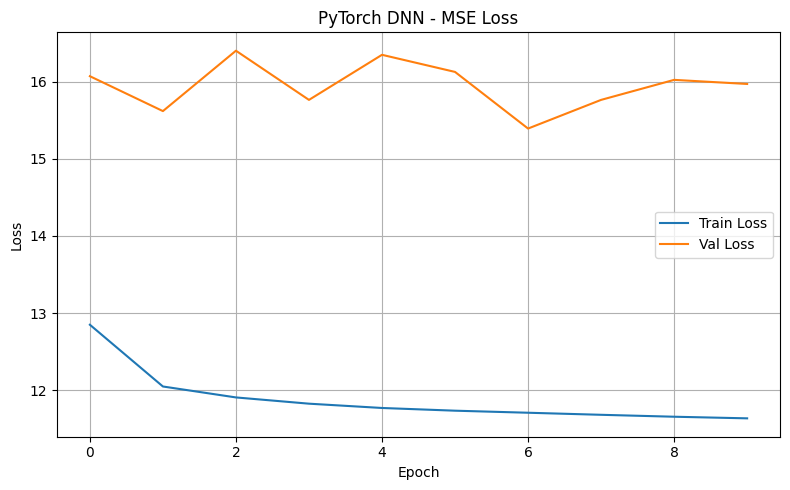

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('PyTorch DNN - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
from sklearn.metrics import mean_absolute_error

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy().flatten()
    actuals = y_test_tensor.cpu().numpy().flatten()
    final_mae = mean_absolute_error(actuals, predictions)

print(f"\n✅ PyTorch DNN Final MAE: {final_mae:.2f} minutes")



✅ PyTorch DNN Final MAE: 2.78 minutes


MLP Model, Adam, Learningrate 0.001

In [141]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --- Build MLP Model Learning rate 0.001---
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history_mlp = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 498s 3ms/step - loss: 12.8785 - mae: 2.4578 - val_loss: 17.2059 - val_mae: 2.7537
Epoch 2/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 487s 3ms/step - loss: 11.3316 - mae: 2.2616 - val_loss: 18.5837 - val_mae: 2.8590
Epoch 3/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 543s 4ms/step - loss: 11.1822 - mae: 2.2381 - val_loss: 17.6231 - val_mae: 2.7787
Epoch 4/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 491s 3ms/step - loss: 11.1290 - mae: 2.2276 - val_loss: 17.9380 - val_mae: 2.7867
Epoch 5/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 477s 3ms/step - loss: 11.0753 - mae: 2.2194 - val_loss: 17.2689 - val_mae: 2.7603
Epoch 6/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 600s 4ms/step - loss: 11.0434 - mae: 2.2147 - val_loss: 17.9970 - val_mae: 2.7875
Epoch 7/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 451s 3ms/step - loss: 11.0127 - mae: 2.2077 - val_loss: 17.9455 - val_mae: 2.7922
Epoch 8/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 435s 3ms/step - loss: 10.9969 - mae: 2.2051 - val_loss: 18

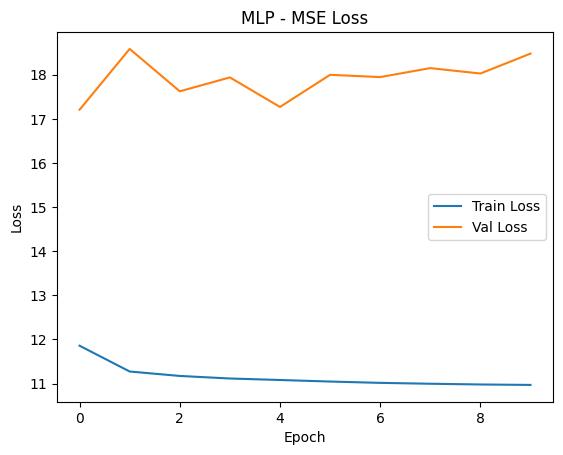

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 18.0784 - mae: 2.7996
✅ MLP Test Loss (MSE): 18.48
✅ MLP Test MAE: 2.82 minutes


In [142]:
# --- Plot Loss Curve ---
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Val Loss')
plt.title('MLP - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Evaluate Model ---
test_loss, test_mae = mlp_model.evaluate(X_test, y_test)
print(f"✅ MLP Test Loss (MSE): {test_loss:.2f}")
print(f"✅ MLP Test MAE: {test_mae:.2f} minutes")

MLP Model, Adam, Learningrate 0.01

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 431s 3ms/step - loss: 13.0242 - mae: 2.5238 - val_loss: 17.5510 - val_mae: 2.9014
Epoch 2/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 470s 3ms/step - loss: 12.1340 - mae: 2.4232 - val_loss: 16.6277 - val_mae: 2.8088
Epoch 3/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 439s 3ms/step - loss: 12.0289 - mae: 2.4051 - val_loss: 17.1462 - val_mae: 2.8194
Epoch 4/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 423s 3ms/step - loss: 11.9100 - mae: 2.3762 - val_loss: 16.1723 - val_mae: 2.7011
Epoch 5/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 440s 3ms/step - loss: 11.8725 - mae: 2.3680 - val_loss: 17.9734 - val_mae: 2.8174
Epoch 6/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 442s 3ms/step - loss: 11.8801 - mae: 2.3667 - val_loss: 17.9020 - val_mae: 2.8108
Epoch 7/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 427s 3ms/step - loss: 11.8465 - mae: 2.3619 - val_loss: 17.1945 - val_mae: 2.7820
Epoch 8/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 403s 3ms/step - loss: 11.8398 - mae: 2.3612 - val_loss: 16

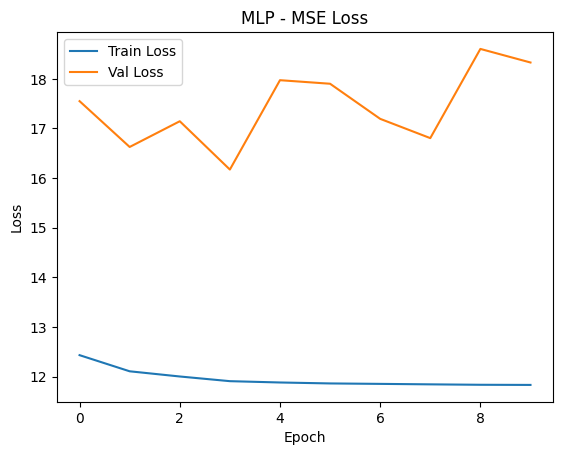

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 17.2799 - mae: 2.7605
✅ MLP Test Loss (MSE): 18.33
✅ MLP Test MAE: 2.86 minutes
37079/37079 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step


In [143]:

# --- Build MLP Model, Learning rate 0.01---
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
mlp_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

# Train
history_mlp = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# --- Plot Loss Curve ---
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Val Loss')
plt.title('MLP - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Evaluate Model ---
test_loss, test_mae = mlp_model.evaluate(X_test, y_test)
print(f"✅ MLP Test Loss (MSE): {test_loss:.2f}")
print(f"✅ MLP Test MAE: {test_mae:.2f} minutes")

# --- Predict on Test Set (Optional) ---
y_pred = mlp_model.predict(X_test)


MLP Model, SGD, Learningrate 0.001

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 369s 2ms/step - loss: 13.6269 - mae: 2.6079 - val_loss: 17.6432 - val_mae: 2.9062
Epoch 2/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 406s 3ms/step - loss: 12.5954 - mae: 2.4932 - val_loss: 16.7599 - val_mae: 2.8208
Epoch 3/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 524s 3ms/step - loss: 12.3200 - mae: 2.4554 - val_loss: 18.2493 - val_mae: 2.9343
Epoch 4/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 391s 3ms/step - loss: 12.2452 - mae: 2.4451 - val_loss: 17.0145 - val_mae: 2.8503
Epoch 5/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 453s 3ms/step - loss: 12.1745 - mae: 2.4400 - val_loss: 17.9983 - val_mae: 2.9804
Epoch 6/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 377s 3ms/step - loss: 12.1778 - mae: 2.4389 - val_loss: 18.3415 - val_mae: 2.9158
Epoch 7/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 375s 3ms/step - loss: 12.1538 - mae: 2.4353 - val_loss: 17.9601 - val_mae: 2.9068
Epoch 8/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 390s 3ms/step - loss: 12.1560 - mae: 2.4359 - val_loss: 16

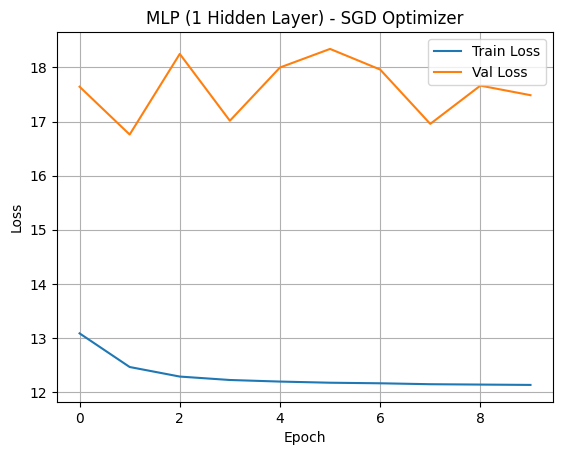

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 17.2903 - mae: 2.8731
✅ SGD - MLP Test Loss (MSE): 17.49
✅ SGD - MLP Test MAE: 2.88 minutes


In [145]:
from tensorflow.keras.optimizers import SGD

model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model_sgd.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='mse',
    metrics=['mae']
)

history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

plt.plot(history_sgd.history['loss'], label='Train Loss')
plt.plot(history_sgd.history['val_loss'], label='Val Loss')
plt.title('MLP (1 Hidden Layer) - SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, mae = model_sgd.evaluate(X_test, y_test)
print(f"✅ SGD - MLP Test Loss (MSE): {loss:.2f}")
print(f"✅ SGD - MLP Test MAE: {mae:.2f} minutes")


MLP Model, SGD, Learningrate 0.01

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 363s 2ms/step - loss: 20.9628 - mae: 3.4167 - val_loss: 28.7816 - val_mae: 4.0069
Epoch 2/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 387s 3ms/step - loss: 21.4396 - mae: 3.4747 - val_loss: 20.2779 - val_mae: 3.2028
Epoch 3/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 364s 2ms/step - loss: 21.4157 - mae: 3.4711 - val_loss: 21.0246 - val_mae: 3.2028
Epoch 4/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 377s 3ms/step - loss: 21.4460 - mae: 3.4732 - val_loss: 21.4649 - val_mae: 3.5162
Epoch 5/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 382s 3ms/step - loss: 21.5934 - mae: 3.4832 - val_loss: 26.7005 - val_mae: 3.8225
Epoch 6/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 385s 3ms/step - loss: 21.5891 - mae: 3.4834 - val_loss: 33.6772 - val_mae: 4.5255
Epoch 7/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 461s 3ms/step - loss: 21.6280 - mae: 3.4875 - val_loss: 32.0356 - val_mae: 4.3537
Epoch 8/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 431s 3ms/step - loss: 21.7000 - mae: 3.4888 - val_loss: 25

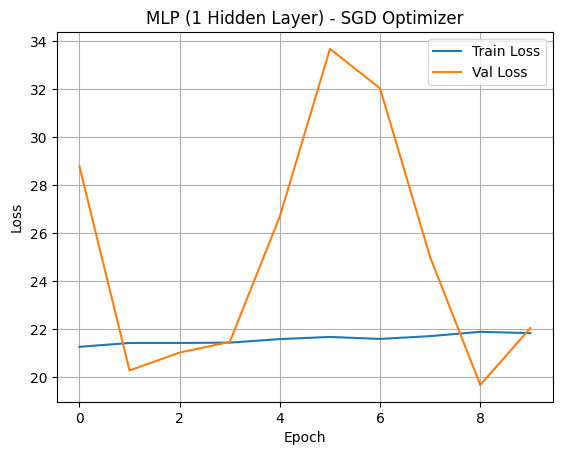

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - loss: 19.1403 - mae: 3.1271
✅ SGD - MLP Test Loss (MSE): 22.04
✅ SGD - MLP Test MAE: 3.42 minutes


In [146]:
from tensorflow.keras.optimizers import SGD

model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model_sgd.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='mse',
    metrics=['mae']
)

history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

plt.plot(history_sgd.history['loss'], label='Train Loss')
plt.plot(history_sgd.history['val_loss'], label='Val Loss')
plt.title('MLP (1 Hidden Layer) - SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, mae = model_sgd.evaluate(X_test, y_test)
print(f"✅ SGD - MLP Test Loss (MSE): {loss:.2f}")
print(f"✅ SGD - MLP Test MAE: {mae:.2f} minutes")


MLP Model, RMSprop, Learningrate 0.001

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 357s 2ms/step - loss: 14.5930 - mae: 2.6360 - val_loss: 18.5006 - val_mae: 3.0096
Epoch 2/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 448s 3ms/step - loss: 12.0781 - mae: 2.4194 - val_loss: 22.4416 - val_mae: 3.0979
Epoch 3/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 424s 3ms/step - loss: 11.9436 - mae: 2.3964 - val_loss: 35.7673 - val_mae: 3.4468
Epoch 4/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 339s 2ms/step - loss: 11.8621 - mae: 2.3805 - val_loss: 56.7579 - val_mae: 3.6944
Epoch 5/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 365s 2ms/step - loss: 11.7960 - mae: 2.3682 - val_loss: 87.2371 - val_mae: 4.0750
Epoch 6/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 389s 3ms/step - loss: 11.6832 - mae: 2.3548 - val_loss: 125.6185 - val_mae: 4.3269
Epoch 7/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 372s 3ms/step - loss: 11.6994 - mae: 2.3536 - val_loss: 163.3448 - val_mae: 4.6203
Epoch 8/10
148314/148314 ━━━━━━━━━━━━━━━━━━━━ 384s 3ms/step - loss: 11.6643 - mae: 2.3479 - val_loss: 

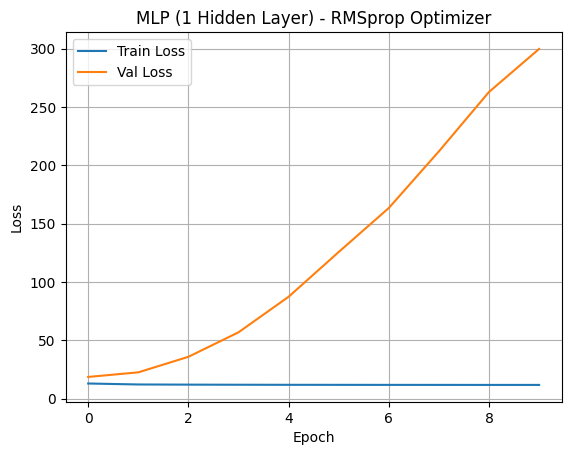

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - loss: 18.6104 - mae: 2.7037
✅ RMSprop - MLP Test Loss (MSE): 299.75
✅ RMSprop - MLP Test MAE: 5.33 minutes


In [147]:
from tensorflow.keras.optimizers import RMSprop

model_rms = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model_rms.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history_rms = model_rms.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

plt.plot(history_rms.history['loss'], label='Train Loss')
plt.plot(history_rms.history['val_loss'], label='Val Loss')
plt.title('MLP (1 Hidden Layer) - RMSprop Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, mae = model_rms.evaluate(X_test, y_test)
print(f"✅ RMSprop - MLP Test Loss (MSE): {loss:.2f}")
print(f"✅ RMSprop - MLP Test MAE: {mae:.2f} minutes")


DNN Model, Adam, Learningrate 0.001

In [ ]:
#  Build DNN Model (Adam) Learning rae 0.001
# -----------------------------

dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history = dnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN with Adam - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

test_loss, test_mae = dnn_model.evaluate(X_test, y_test)
print(f"✅ DNN Test Loss (MSE) with Adam: {test_loss:.2f}")
print(f"✅ DNN Test MAE with Adam: {test_mae:.2f} minutes")

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - loss: 16.0175 - mae: 2.7436

✅ DNN Test Loss (MSE) with Adam: 18.60

✅ DNN Test MAE with Adam: 2.95 minutes

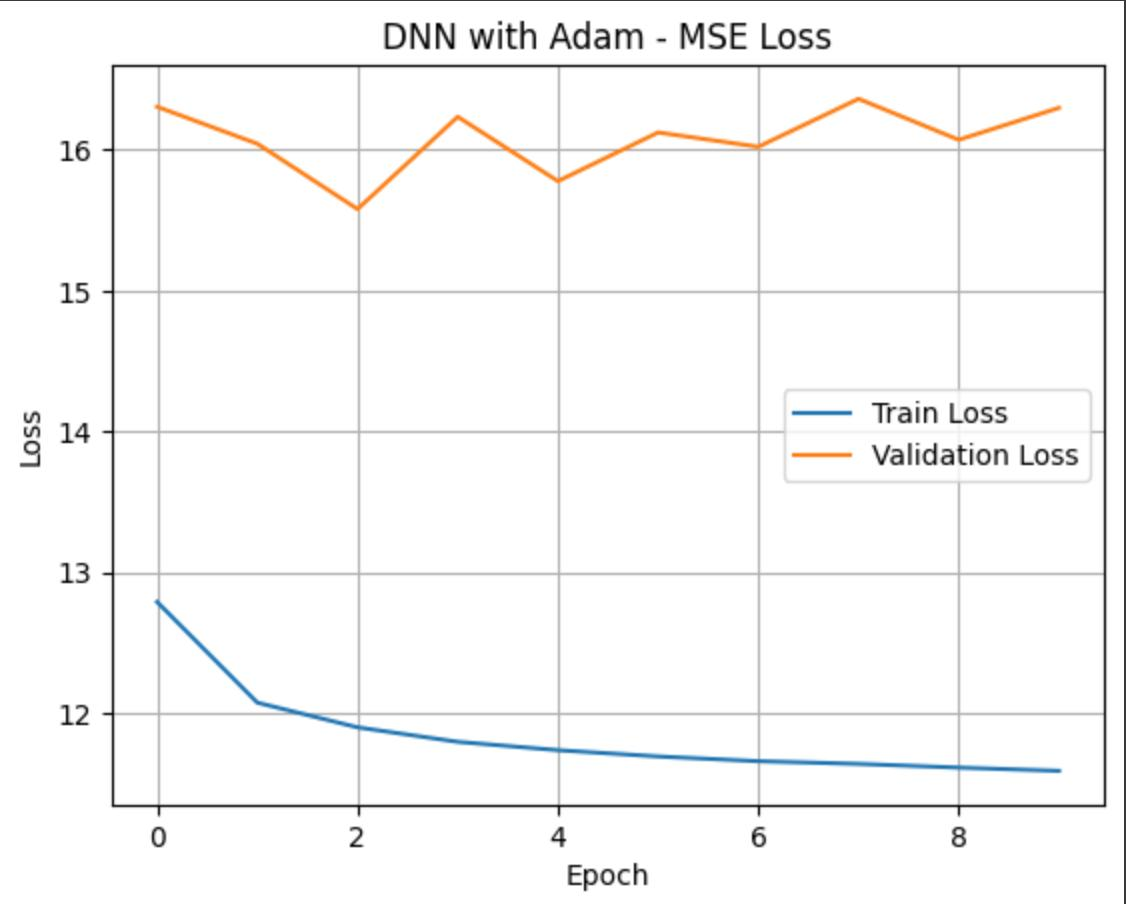

DNN Model, Adam, Learningrate 0.01

In [ ]:
# Build DNN Model (Adam) Learning rate 0.01
# -----------------------------

dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

dnn_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

history = dnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN with Adam - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

test_loss, test_mae = dnn_model.evaluate(X_test, y_test)
print(f"✅ DNN Test Loss (MSE) with Adam: {test_loss:.2f}")
print(f"✅ DNN Test MAE with Adam: {test_mae:.2f} minutes")

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 16.5352 - mae: 2.7542

✅ DNN Test Loss (MSE) with Adam: 17.89

✅ DNN Test MAE with Adam: 2.87 minutes

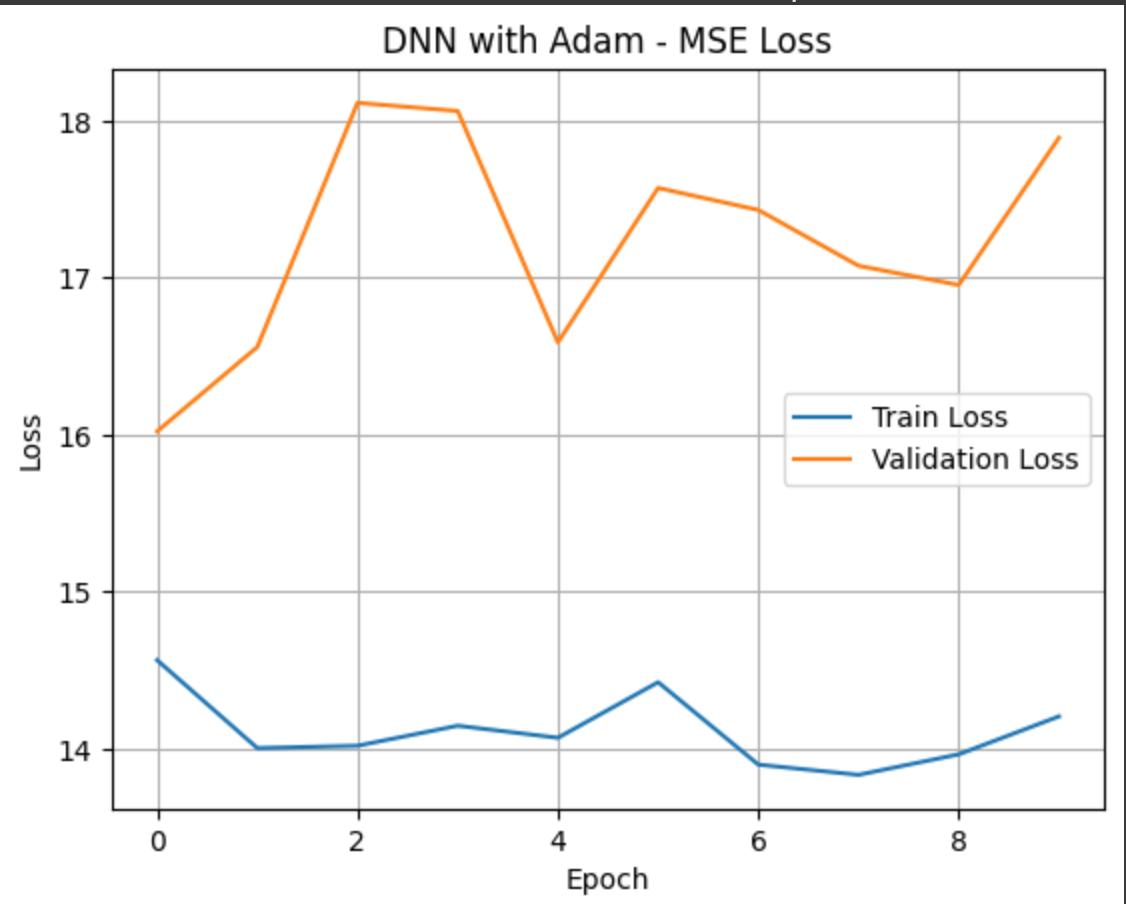

DNN Model, RMSprop, Learningrate 0.001

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# --- Build DNN with 4 hidden layers and RMSprop optimizer Learning rate 0.001---
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile with RMSprop optimizer
dnn_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model
history = dnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN - MSE Loss (RMSprop Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
test_loss, test_mae = dnn_model.evaluate(X_test, y_test)
print(f"✅ DNN Test Loss (MSE) with RMSprop: {test_loss:.2f}")
print(f"✅ DNN Test MAE with RMSprop: {test_mae:.2f} minutes")


37079/37079 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 21.6625 - mae: 3.7229

✅ DNN Test Loss (MSE) with RMSprop: 23.43

✅ DNN Test MAE with RMSprop: 3.85 minutes

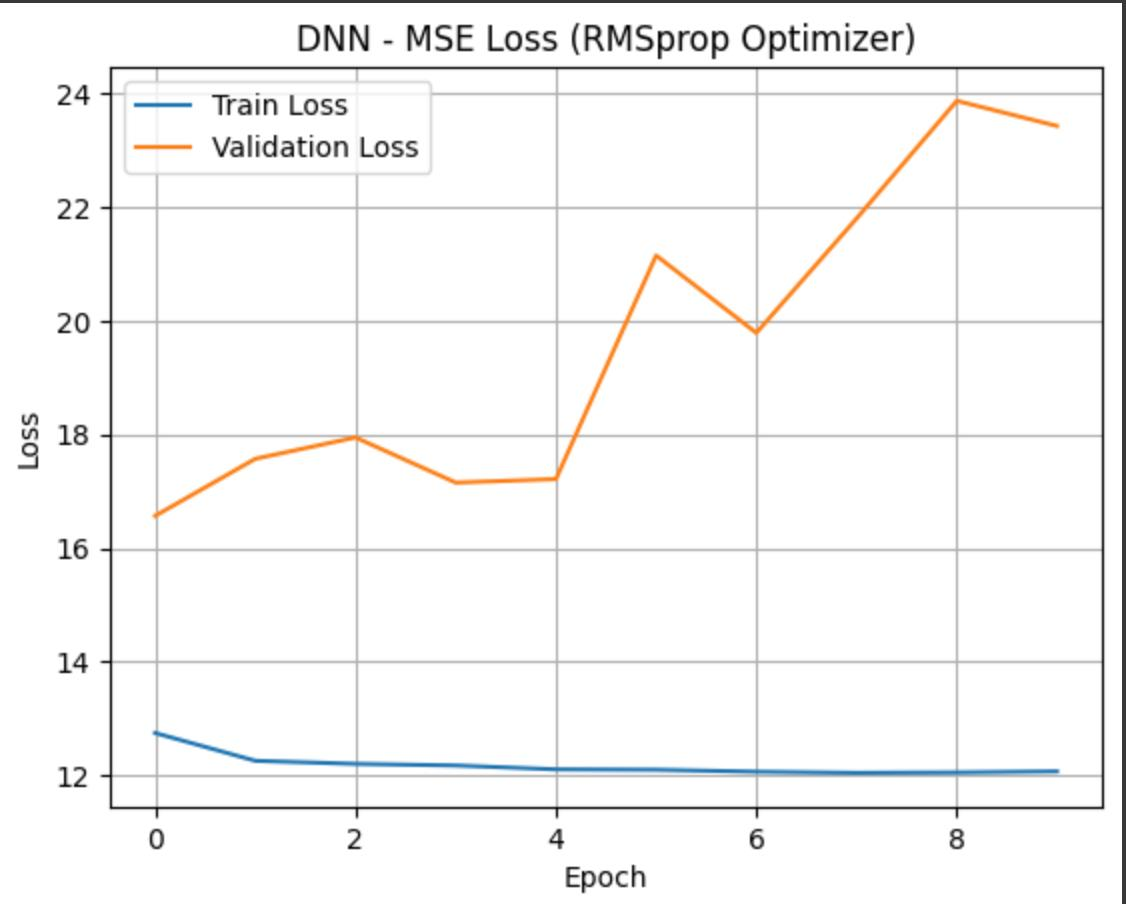

DNN Model, RMSprop, Learningrate 0.01

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# --- Build DNN with 4 hidden layers and RMSprop optimizer Learning rate 0.01---
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile with RMSprop optimizer
dnn_model.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

# Train the model
history = dnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN - MSE Loss (RMSprop Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
test_loss, test_mae = dnn_model.evaluate(X_test, y_test)
print(f"✅ DNN Test Loss (MSE) with RMSprop: {test_loss:.2f}")
print(f"✅ DNN Test MAE with RMSprop: {test_mae:.2f} minutes")

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 18.3112 - mae: 2.8431

✅ DNN Test Loss (MSE) with RMSprop: 21.03

✅ DNN Test MAE with RMSprop: 3.04 minutes

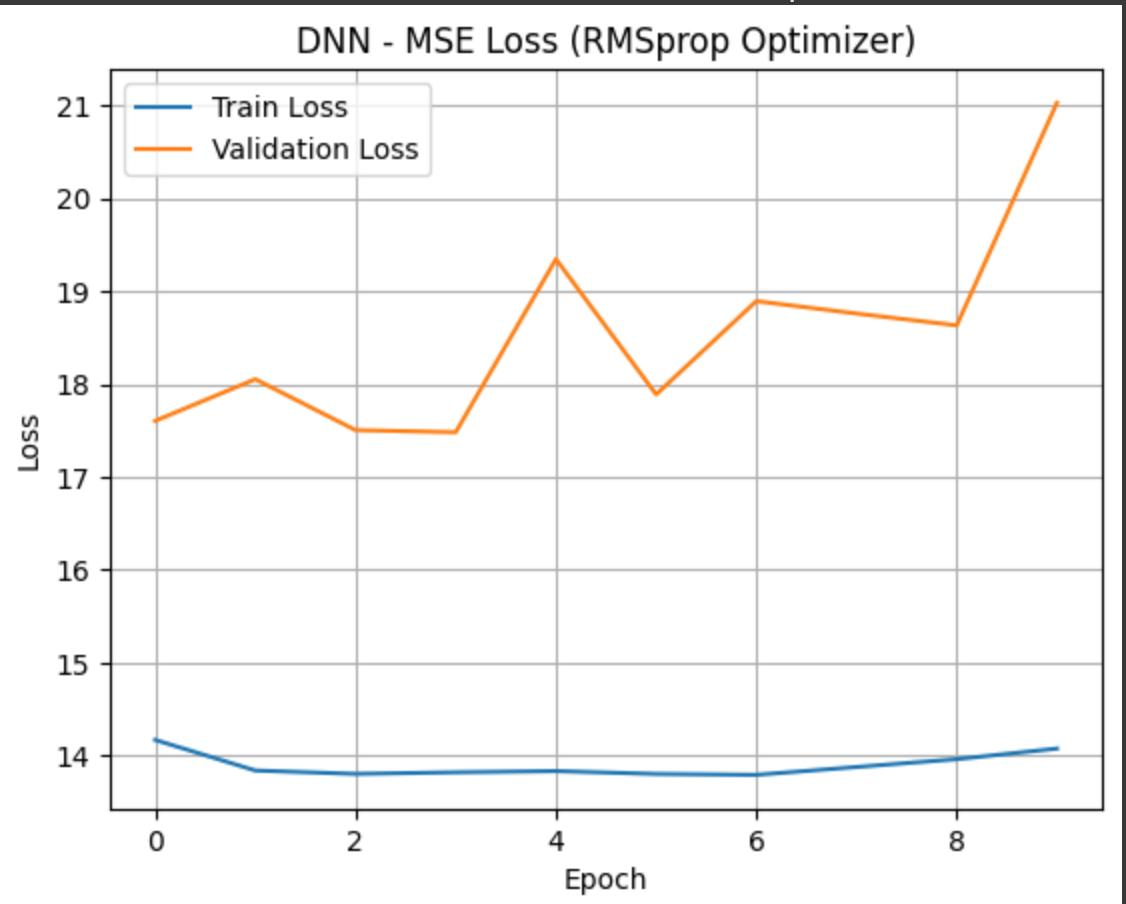

Linear Regression Model, Opimiser: Adam, Learning Rate: 0.001

In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the Linear Regression model (no hidden layers)
linear_model = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],))  # No hidden layers
])

# Compile the model with Adam optimizer and a learning rate of 0.001
linear_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Set learning rate to 0.001
    loss='mean_squared_error',  # MSE loss for regression
    metrics=['mean_absolute_error']  # MAE as an additional metric
)

# Train the model
history_lr = linear_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=10,
    verbose=1
)

# Plot the training and validation loss
plt.plot(history_lr.history['loss'], label='Train Loss')
plt.plot(history_lr.history['val_loss'], label='Validation Loss')
plt.title('Linear Regression - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = linear_model.evaluate(X_test_scaled, y_test, verbose=1)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 20.5397 - mean_absolute_error: 3.2876

Test Loss (MSE): 26.298925399780273

Test MAE: 3.6433496475219727


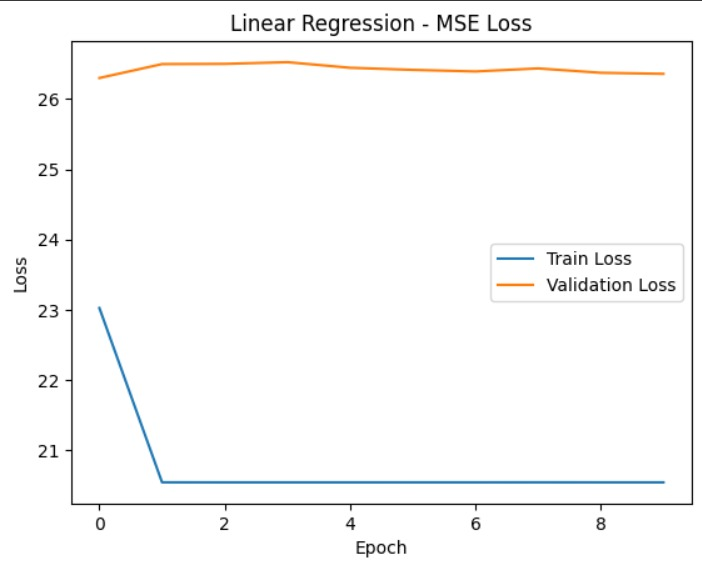

Linear Regression Model, Opimiser: Adam, Learning Rate: 0.01

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# Define model
linear_model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

# Compile model with optimizer and loss
linear_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

# Train model
history_lr = linear_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)
# Plot training vs validation loss
plt.plot(history_lr.history['loss'], label='Train Loss')
plt.plot(history_lr.history['val_loss'], label='Val Loss')
plt.title('Linear Regression - MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_mae = linear_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


Linear Regression model, Adam, Learning Rate: 0.01

37079/37079 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 20.5805 - mae: 3.2810

Test Loss (MSE): 26.201984405517578

Test MAE: 3.621781826019287


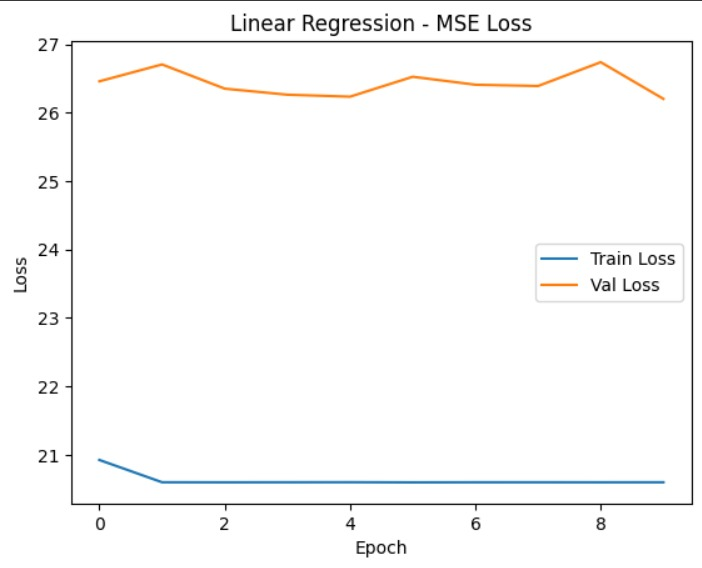

Linear Regression Model, Opimiser: SGD, Learning Rate: 0.001

In [ ]:
from tensorflow.keras.optimizers import SGD

# Build model
model_sgd = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

# Compile
model_sgd.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='mse',
    metrics=['mae']
)

# Train
history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot
plt.plot(history_sgd.history['loss'], label='Train Loss')
plt.plot(history_sgd.history['val_loss'], label='Val Loss')
plt.title('Linear Model - SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
loss, mae = model_sgd.evaluate(X_test, y_test)
print(f"✅ SGD - Test Loss (MSE): {loss:.2f}")
print(f"✅ SGD - Test MAE: {mae:.2f} minutes")


37079/37079 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 20.5378 - mae: 3.2661

✅ SGD - Test Loss (MSE): 24.57

✅ SGD - Test MAE: 3.56 minutes


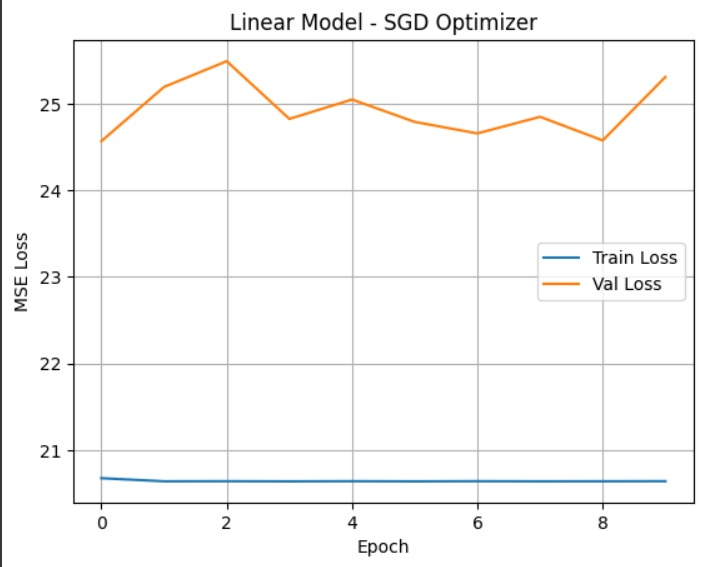

Linear Regression Model, Opimiser: SGD, Learning Rate: 0.01

In [ ]:
from tensorflow.keras.optimizers import SGD

# Build model
model_sgd = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

# Compile
model_sgd.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='mse',
    metrics=['mae']
)

# Train
history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot
plt.plot(history_sgd.history['loss'], label='Train Loss')
plt.plot(history_sgd.history['val_loss'], label='Val Loss')
plt.title('Linear Model - SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
loss, mae = model_sgd.evaluate(X_test, y_test)
print(f"✅ SGD - Test Loss (MSE): {loss:.2f}")
print(f"✅ SGD - Test MAE: {mae:.2f} minutes")


Linear Regression model, SDG, Learning Rate: 0.01

SGD - Test Loss (MSE): 24.23

✅ SGD - Test MAE: 3.52 minutes

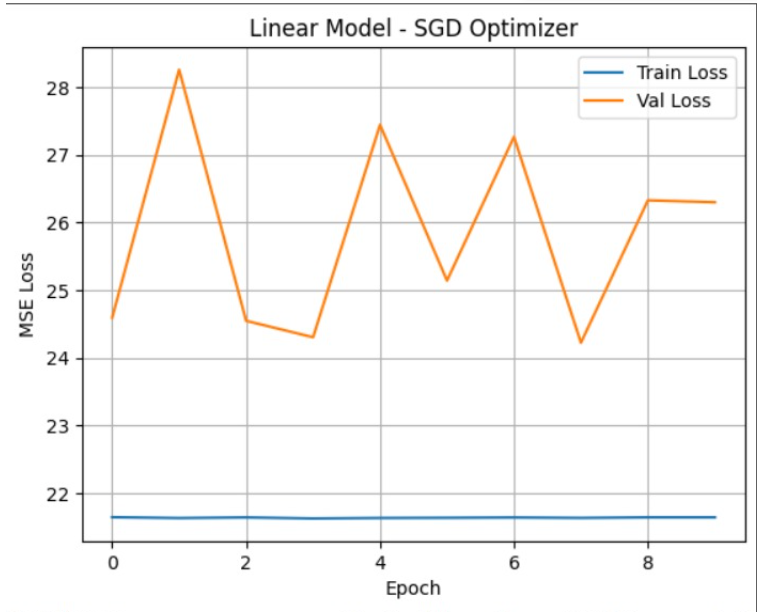

Linear Regression Model, Opimiser: RMSprops, Learning Rate: 0.001

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Build model
model_rms = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

# Compile
model_rms.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history_rms = model_rms.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot
plt.plot(history_rms.history['loss'], label='Train Loss')
plt.plot(history_rms.history['val_loss'], label='Val Loss')
plt.title('Linear Model - RMSprop Optimizer')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
loss, mae = model_rms.evaluate(X_test, y_test)
print(f"✅ RMSprop - Test Loss (MSE): {loss:.2f}")
print(f"✅ RMSprop - Test MAE: {mae:.2f} minutes")


37079/37079 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - loss: 20.5414 - mae: 3.2811

✅ RMSprop - Test Loss (MSE): 24.14

✅ RMSprop - Test MAE: 3.53 minutes

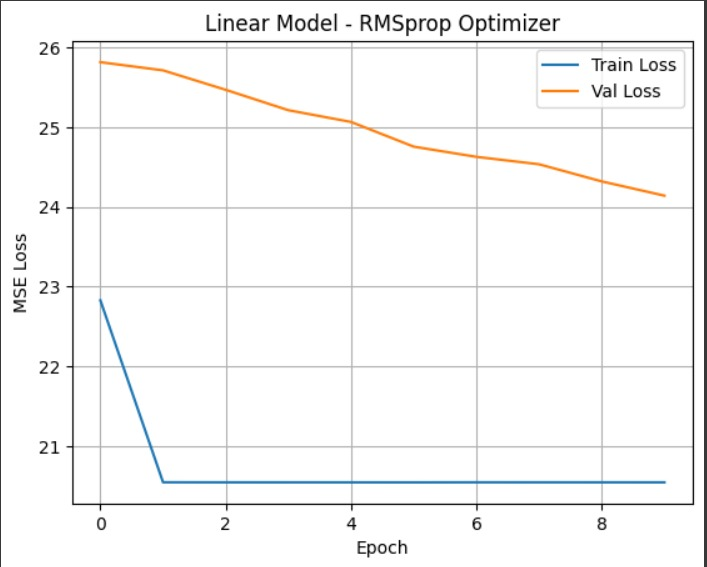

Linear Regression Model, Opimiser: RMSprops, Learning Rate: 0.01

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Build model
model_rms = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

# Compile
model_rms.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history_rms = model_rms.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot
plt.plot(history_rms.history['loss'], label='Train Loss')
plt.plot(history_rms.history['val_loss'], label='Val Loss')
plt.title('Linear Model - RMSprop Optimizer')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
loss, mae = model_rms.evaluate(X_test, y_test)
print(f"✅ RMSprop - Test Loss (MSE): {loss:.2f}")
print(f"✅ RMSprop - Test MAE: {mae:.2f} minutes")


37079/37079 ━━━━━━━━━━━━━━━━━━━━ 55s 1ms/step - loss: 21.1727 - mae: 3.2959

✅ RMSprop - Test Loss (MSE): 62.51

✅ RMSprop - Test MAE: 4.37 minutes

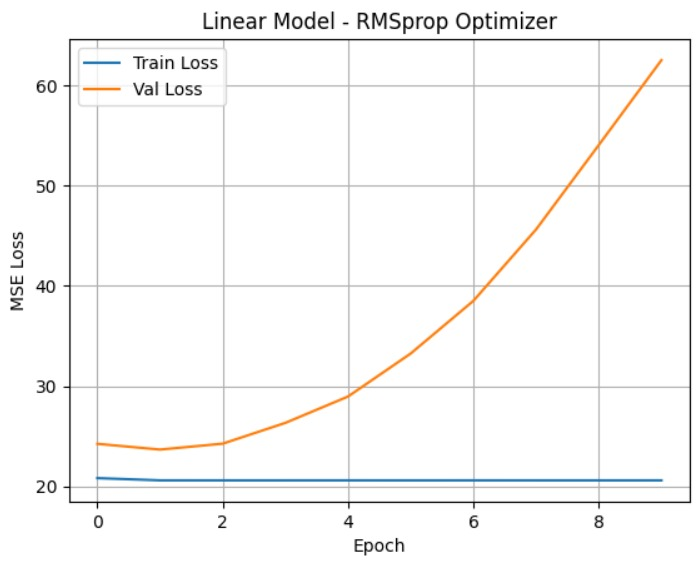

Camparing All Models

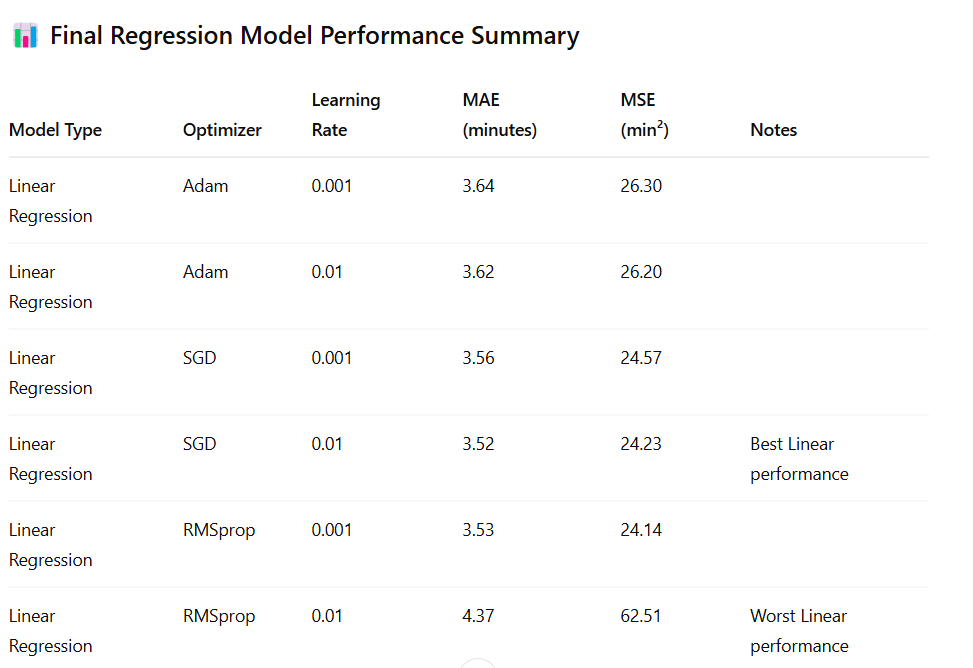

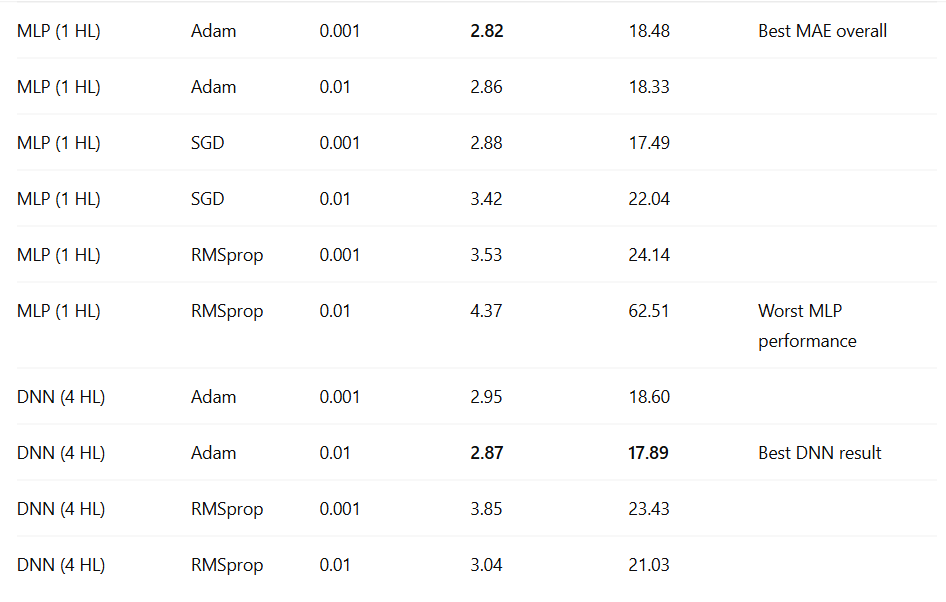

We selected the MLP model with Adam optimizer (lr=0.001) as the best-performing model, achieving the lowest MAE of 2.82 minutes, making it the most accurate for practical taxi trip duration estimation.

In [152]:
# Assign the best model
best_model = mlp_model

# Predict on test data
preds = best_model.predict(X_test)

# Compare predicted vs actual durations
for i in range(5):
    predicted = preds[i][0]
    actual = y_test.iloc[i]
    print(f"Predicted: {predicted:.2f} min | Actual: {actual:.2f} min")


37079/37079 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step
Predicted: 3.67 min | Actual: 3.62 min
Predicted: 8.47 min | Actual: 5.88 min
Predicted: 16.43 min | Actual: 14.32 min
Predicted: 9.29 min | Actual: 14.17 min
Predicted: 5.28 min | Actual: 4.25 min


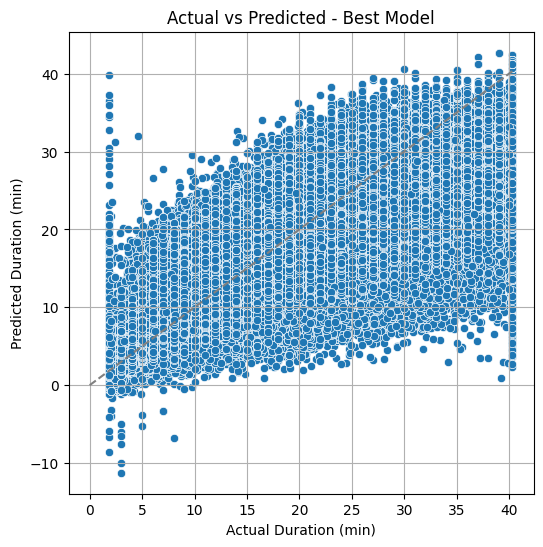

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=preds.flatten())
plt.xlabel("Actual Duration (min)")
plt.ylabel("Predicted Duration (min)")
plt.title("Actual vs Predicted - Best Model")
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='gray')  # perfect line
plt.grid()
plt.show()
